### Importación de datos



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


### Importación de datos



In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()
tienda_completa = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

print("ANÁLISIS DE DATOS - ALURASTORE LATAM")
print("=" * 50)
print(f"Total de registros: {len(tienda_completa):,}")
print(f"Período de análisis: {tienda_completa['Fecha de Compra'].min()} - {tienda_completa['Fecha de Compra'].max()}")
print(f"Ciudades analizadas: {tienda_completa['Lugar de Compra'].nunique()}")
print(f"Productos únicos: {tienda_completa['Producto'].nunique()}")

# Preparación de datos para análisis temporal
tienda_completa['Fecha de Compra'] = pd.to_datetime(tienda_completa['Fecha de Compra'], format='%d/%m/%Y')
tienda_completa['Año'] = tienda_completa['Fecha de Compra'].dt.year
tienda_completa['Mes'] = tienda_completa['Fecha de Compra'].dt.month


ANÁLISIS DE DATOS - ALURASTORE LATAM
Total de registros: 9,435
Período de análisis: 01/01/2020 - 31/12/2022
Ciudades analizadas: 19
Productos únicos: 51


#1. Análisis de facturación



In [ ]:
print("\n 1. ANÁLISIS DE FACTURACIÓN")
print("-" * 30)


 1. ANÁLISIS DE FACTURACIÓN
------------------------------


In [ ]:
facturacion_total = tienda_completa['Precio'].sum()
facturacion_promedio = tienda_completa['Precio'].mean()
facturacion_ciudad = tienda_completa.groupby('Lugar de Compra')['Precio'].sum().sort_values(ascending=False)

print(f"Facturación total: ${facturacion_total:,.0f} COP")
print(f"Facturación promedio por transacción: ${facturacion_promedio:,.0f} COP")
print(f"Número total de transacciones: {len(tienda_completa):,}")

print(f"\nFacturación por ciudad (Top 10):")
for i, (ciudad, monto) in enumerate(facturacion_ciudad.head(10).items(), 1):
    porcentaje = (monto / facturacion_total) * 100
    print(f"{i:2d}. {ciudad:15s}: ${monto:12,.0f} COP ({porcentaje:5.1f}%)")


Facturación total: $4,403,619,200 COP
Facturación promedio por transacción: $466,732 COP
Número total de transacciones: 9,435

Facturación por ciudad (Top 10):
 1. Bogotá         : $1,814,858,300 COP ( 41.2%)
 2. Medellín       : $1,096,669,200 COP ( 24.9%)
 3. Cali           : $ 506,526,100 COP ( 11.5%)
 4. Pereira        : $ 225,927,300 COP (  5.1%)
 5. Barranquilla   : $ 132,040,500 COP (  3.0%)
 6. Cartagena      : $ 102,376,700 COP (  2.3%)
 7. Cúcuta         : $  99,369,100 COP (  2.3%)
 8. Bucaramanga    : $  90,573,300 COP (  2.1%)
 9. Riohacha       : $  73,879,700 COP (  1.7%)
10. Leticia        : $  67,149,900 COP (  1.5%)


In [ ]:
facturacion_mensual = tienda_completa.groupby(['Año', 'Mes'])['Precio'].sum()
facturacion_anual = tienda_completa.groupby('Año')['Precio'].sum()

print(f"\nFacturación anual:")
for año, monto in facturacion_anual.items():
    print(f"  {año}: ${monto:,.0f} COP")


Facturación anual:
  2020: $1,341,955,000 COP
  2021: $1,424,114,300 COP
  2022: $1,327,451,900 COP
  2023: $310,098,000 COP


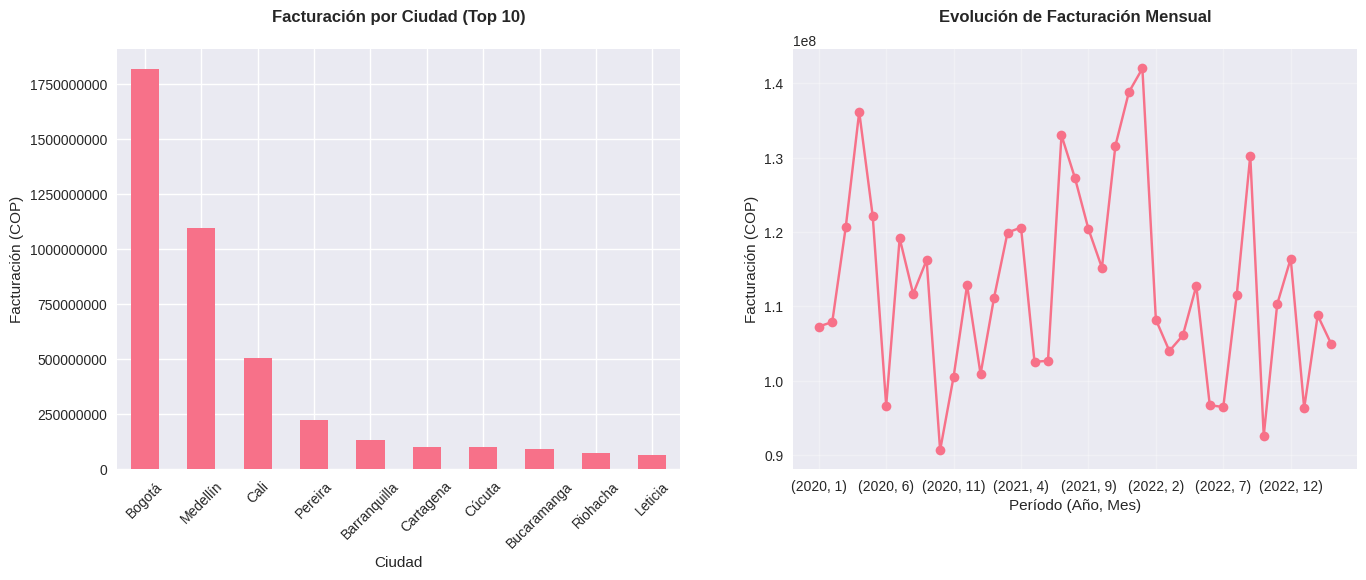

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
facturacion_ciudad.head(10).plot(kind='bar')
plt.title('Facturación por Ciudad (Top 10)', fontweight='bold', pad=20)
plt.xlabel('Ciudad')
plt.ylabel('Facturación (COP)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(2, 2, 2)
facturacion_mensual.plot(kind='line', marker='o')
plt.title('Evolución de Facturación Mensual', fontweight='bold', pad=20)
plt.xlabel('Período (Año, Mes)')
plt.ylabel('Facturación (COP)')
plt.grid(True, alpha=0.3)

# 2. Ventas por categoría

In [ ]:
print("\n2. VENTAS POR CATEGORÍA")
print("-" * 30)


2. VENTAS POR CATEGORÍA
------------------------------


In [ ]:
ventas_categoria = tienda_completa.groupby('Categoría del Producto').agg({
    'Precio': ['sum', 'count', 'mean'],
    'Calificación': 'mean'
}).round(2)

ventas_categoria.columns = ['Facturación_Total', 'Cantidad_Ventas', 'Precio_Promedio', 'Calificación_Promedio']
ventas_categoria = ventas_categoria.sort_values('Facturación_Total', ascending=False)

print("Análisis detallado por categoría:")
print("-" * 40)
for categoria in ventas_categoria.index:
    datos = ventas_categoria.loc[categoria]
    porcentaje_facturacion = (datos['Facturación_Total'] / facturacion_total) * 100
    porcentaje_ventas = (datos['Cantidad_Ventas'] / len(tienda_completa)) * 100

    print(f"\n{categoria}:")
    print(f"  Facturación: ${datos['Facturación_Total']:12,.0f} COP ({porcentaje_facturacion:5.1f}% del total)")
    print(f"  Ventas:      {datos['Cantidad_Ventas']:12,.0f} unidades ({porcentaje_ventas:5.1f}% del total)")
    print(f"  Precio prom: ${datos['Precio_Promedio']:12,.0f} COP")
    print(f"  Calificación:{datos['Calificación_Promedio']:12.1f}/5 estrellas")

Análisis detallado por categoría:
----------------------------------------

Electrónicos:
  Facturación: $1,660,576,500 COP ( 37.7% del total)
  Ventas:             1,772 unidades ( 18.8% del total)
  Precio prom: $     937,120 COP
  Calificación:         4.0/5 estrellas

Electrodomésticos:
  Facturación: $1,324,751,100 COP ( 30.1% del total)
  Ventas:             1,149 unidades ( 12.2% del total)
  Precio prom: $   1,152,960 COP
  Calificación:         4.0/5 estrellas

Muebles:
  Facturación: $ 757,661,000 COP ( 17.2% del total)
  Ventas:             1,886 unidades ( 20.0% del total)
  Precio prom: $     401,729 COP
  Calificación:         4.0/5 estrellas

Instrumentos musicales:
  Facturación: $ 348,772,600 COP (  7.9% del total)
  Ventas:               753 unidades (  8.0% del total)
  Precio prom: $     463,177 COP
  Calificación:         4.0/5 estrellas

Deportes y diversión:
  Facturación: $ 142,977,700 COP (  3.2% del total)
  Ventas:             1,113 unidades ( 11.8% del total

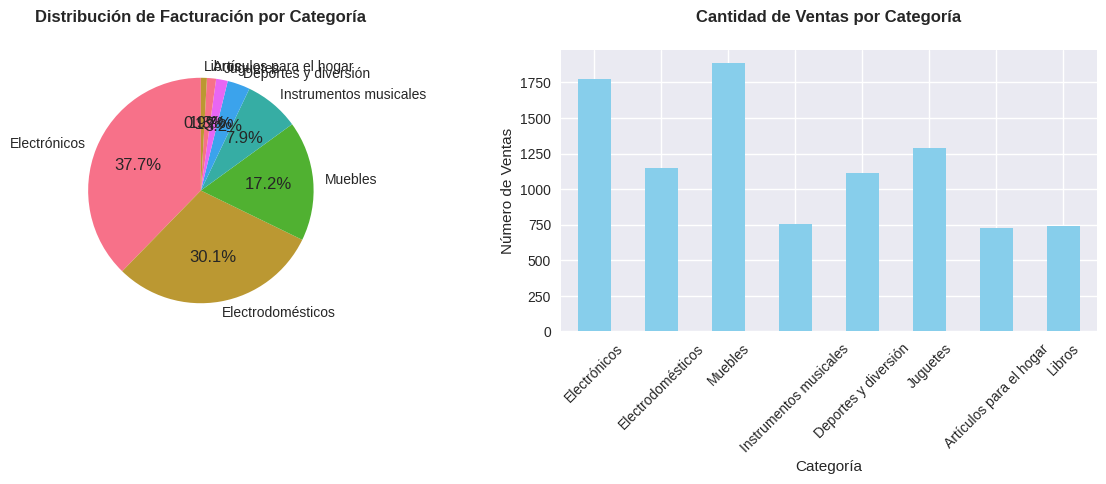

In [ ]:
plt.subplot(2, 2, 3)
ventas_categoria['Facturación_Total'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Facturación por Categoría', fontweight='bold', pad=20)
plt.ylabel('')

plt.subplot(2, 2, 4)
ventas_categoria['Cantidad_Ventas'].plot(kind='bar', color='skyblue')
plt.title('Cantidad de Ventas por Categoría', fontweight='bold', pad=20)
plt.xlabel('Categoría')
plt.ylabel('Número de Ventas')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
print("\n3. CALIFICACIÓN PROMEDIO DE LA TIENDA")
print("-" * 30)


3. CALIFICACIÓN PROMEDIO DE LA TIENDA
------------------------------


In [ ]:
calificacion_general = tienda_completa['Calificación'].mean()
distribucion_calificaciones = tienda_completa['Calificación'].value_counts().sort_index()
calificaciones_ciudad = tienda_completa.groupby('Lugar de Compra')['Calificación'].mean().sort_values(ascending=False)
calificaciones_categoria = tienda_completa.groupby('Categoría del Producto')['Calificación'].mean().sort_values(ascending=False)

print(f"Calificación promedio general: {calificacion_general:.2f}/5.0")
print(f"Desviación estándar: {tienda_completa['Calificación'].std():.2f}")

print(f"\nDistribución de calificaciones:")
for calificacion in sorted(distribucion_calificaciones.index):
    cantidad = distribucion_calificaciones[calificacion]
    porcentaje = (cantidad / len(tienda_completa)) * 100
    print(f"  {calificacion} estrellas: {cantidad:6,} ({porcentaje:5.1f}%)")

print(f"\nCalificación promedio por ciudad (Top 10):")
for i, (ciudad, calif) in enumerate(calificaciones_ciudad.head(10).items(), 1):
    print(f"{i:2d}. {ciudad:15s}: {calif:.2f}/5.0")

print(f"\nCalificación promedio por categoría:")
for categoria, calif in calificaciones_categoria.items():
    print(f"  {categoria:20s}: {calif:.2f}/5.0")

Calificación promedio general: 4.01/5.0
Desviación estándar: 1.39

Distribución de calificaciones:
  1 estrellas:  1,199 ( 12.7%)
  2 estrellas:    343 (  3.6%)
  3 estrellas:    830 (  8.8%)
  4 estrellas:  1,813 ( 19.2%)
  5 estrellas:  5,250 ( 55.6%)

Calificación promedio por ciudad (Top 10):
 1. Pasto          : 4.15/5.0
 2. Bogotá         : 4.11/5.0
 3. Valledupar     : 4.07/5.0
 4. Cali           : 4.05/5.0
 5. Cartagena      : 4.02/5.0
 6. Pereira        : 4.01/5.0
 7. Bucaramanga    : 3.98/5.0
 8. Cúcuta         : 3.94/5.0
 9. Medellín       : 3.93/5.0
10. Leticia        : 3.92/5.0

Calificación promedio por categoría:
  Juguetes            : 4.07/5.0
  Muebles             : 4.03/5.0
  Electrodomésticos   : 4.01/5.0
  Libros              : 4.00/5.0
  Instrumentos musicales: 4.00/5.0
  Electrónicos        : 3.99/5.0
  Deportes y diversión: 3.99/5.0
  Artículos para el hogar: 3.98/5.0


(0.0, 5.5)

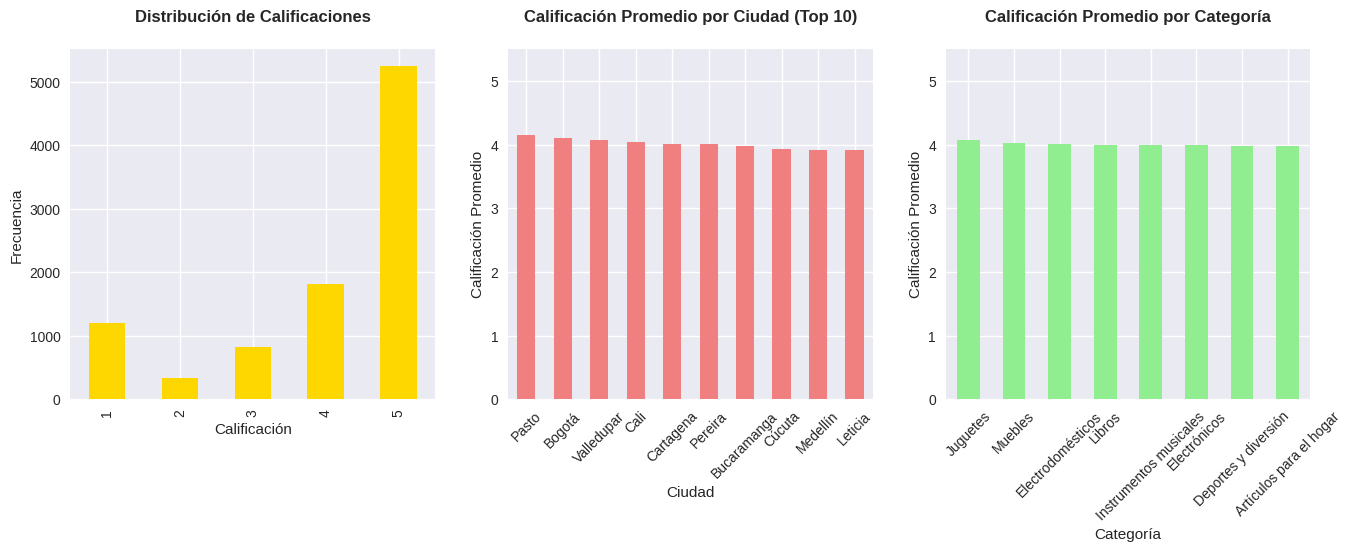

In [ ]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
distribucion_calificaciones.plot(kind='bar', color='gold')
plt.title('Distribución de Calificaciones', fontweight='bold', pad=20)
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 2)
calificaciones_ciudad.head(10).plot(kind='bar', color='lightcoral')
plt.title('Calificación Promedio por Ciudad (Top 10)', fontweight='bold', pad=20)
plt.xlabel('Ciudad')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.ylim(0, 5.5)

plt.subplot(2, 3, 3)
calificaciones_categoria.plot(kind='bar', color='lightgreen')
plt.title('Calificación Promedio por Categoría', fontweight='bold', pad=20)
plt.xlabel('Categoría')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.ylim(0, 5.5)

# 4. Productos más y menos vendidos

In [ ]:
print("\n4. PRODUCTOS MÁS Y MENOS VENDIDOS")
print("-" * 30)


4. PRODUCTOS MÁS Y MENOS VENDIDOS
------------------------------


In [ ]:
productos_analysis = tienda_completa.groupby('Producto').agg({
    'Precio': ['sum', 'count', 'mean'],
    'Calificación': 'mean',
    'Costo de envío': 'mean'
}).round(2)

productos_analysis.columns = ['Facturación_Total', 'Cantidad_Vendida', 'Precio_Promedio', 'Calificación_Promedio', 'Costo_Envio_Promedio']
productos_por_cantidad = productos_analysis.sort_values('Cantidad_Vendida', ascending=False)
productos_por_facturacion = productos_analysis.sort_values('Facturación_Total', ascending=False)

print("TOP 10 PRODUCTOS MÁS VENDIDOS (por cantidad):")
print("-" * 50)
for i, (producto, datos) in enumerate(productos_por_cantidad.head(10).iterrows(), 1):
    print(f"{i:2d}. {producto:25s}: {datos['Cantidad_Vendida']:4.0f} unidades")
    print(f"     Facturación: ${datos['Facturación_Total']:10,.0f} COP")
    print(f"     Calificación: {datos['Calificación_Promedio']:4.1f}/5.0")
    print()

print("TOP 10 PRODUCTOS POR FACTURACIÓN:")
print("-" * 40)
for i, (producto, datos) in enumerate(productos_por_facturacion.head(10).iterrows(), 1):
    print(f"{i:2d}. {producto:25s}: ${datos['Facturación_Total']:10,.0f} COP")
    print(f"     Cantidad vendida: {datos['Cantidad_Vendida']:4.0f} unidades")
    print(f"     Precio promedio: ${datos['Precio_Promedio']:8,.0f} COP")
    print()

print("PRODUCTOS CON MENOR ROTACIÓN (Bottom 5):")
print("-" * 45)
for i, (producto, datos) in enumerate(productos_por_cantidad.tail(5).iterrows(), 1):
    print(f"{i}. {producto}: {datos['Cantidad_Vendida']:,.0f} unidades vendidas")

TOP 10 PRODUCTOS MÁS VENDIDOS (por cantidad):
--------------------------------------------------
 1. Mesa de noche            :  210 unidades
     Facturación: $58,419,500 COP
     Calificación:  4.0/5.0

 2. Microondas               :  206 unidades
     Facturación: $115,699,500 COP
     Calificación:  4.0/5.0

 3. Carrito de control remoto:  206 unidades
     Facturación: $14,767,700 COP
     Calificación:  4.1/5.0

 4. Batería                  :  203 unidades
     Facturación: $147,806,300 COP
     Calificación:  4.1/5.0

 5. Cama king                :  201 unidades
     Facturación: $135,780,400 COP
     Calificación:  4.0/5.0

 6. Modelado predictivo      :  200 unidades
     Facturación: $12,616,100 COP
     Calificación:  3.9/5.0

 7. Secadora de ropa         :  200 unidades
     Facturación: $210,238,000 COP
     Calificación:  4.0/5.0

 8. Set de ollas             :  200 unidades
     Facturación: $30,506,400 COP
     Calificación:  4.0/5.0

 9. Cama box                 :  199

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'TV LED UHD 4K'),
  Text(1, 0, 'Iphone 15'),
  Text(2, 0, 'Refrigerador'),
  Text(3, 0, 'Smart TV'),
  Text(4, 0, 'Lavadora de ropa'),
  Text(5, 0, 'Lavavajillas'),
  Text(6, 0, 'Tablet ABXY'),
  Text(7, 0, 'Secadora de ropa'),
  Text(8, 0, 'Celular ABXY'),
  Text(9, 0, 'Batería')])

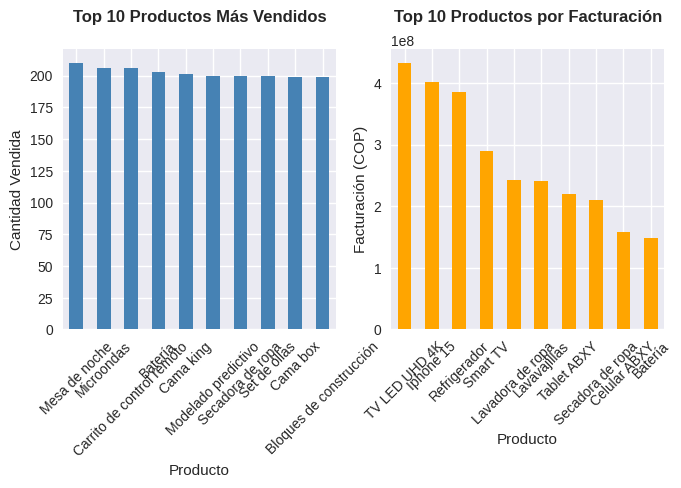

In [ ]:
plt.subplot(2, 3, 4)
productos_por_cantidad.head(10)['Cantidad_Vendida'].plot(kind='bar', color='steelblue')
plt.title('Top 10 Productos Más Vendidos', fontweight='bold', pad=20)
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
productos_por_facturacion.head(10)['Facturación_Total'].plot(kind='bar', color='orange')
plt.title('Top 10 Productos por Facturación', fontweight='bold', pad=20)
plt.xlabel('Producto')
plt.ylabel('Facturación (COP)')
plt.xticks(rotation=45)

# 5. Envío promedio por tienda

In [ ]:
print("\n5. ENVÍO PROMEDIO POR TIENDA")
print("-" * 30)



5. ENVÍO PROMEDIO POR TIENDA
------------------------------


In [ ]:
envio_general = tienda_completa['Costo de envío'].mean()
envio_total = tienda_completa['Costo de envío'].sum()
envio_por_ciudad = tienda_completa.groupby('Lugar de Compra')['Costo de envío'].agg(['mean', 'sum', 'count', 'std']).round(0)
envio_por_ciudad.columns = ['Costo_Promedio', 'Costo_Total', 'Cantidad_Envios', 'Desviacion_Std']
envio_por_ciudad = envio_por_ciudad.sort_values('Costo_Promedio', ascending=False)

print(f"Costo de envío promedio general: ${envio_general:,.0f} COP")
print(f"Costo total de envíos: ${envio_total:,.0f} COP")
print(f"Porcentaje del costo de envío vs facturación: {(envio_total/facturacion_total)*100:.1f}%")

print(f"\nAnálisis de envío por ciudad:")
print("-" * 50)
for ciudad in envio_por_ciudad.index:
    datos = envio_por_ciudad.loc[ciudad]
    print(f"\n{ciudad}:")
    print(f"  Costo promedio:    ${datos['Costo_Promedio']:8,.0f} COP")
    print(f"  Costo total:       ${datos['Costo_Total']:8,.0f} COP")
    print(f"  Cantidad de envíos:{datos['Cantidad_Envios']:8,.0f}")
    if not np.isnan(datos['Desviacion_Std']):
        print(f"  Desviación std:    ${datos['Desviacion_Std']:8,.0f} COP")

Costo de envío promedio general: $24,875 COP
Costo total de envíos: $234,697,000 COP
Porcentaje del costo de envío vs facturación: 5.3%

Análisis de envío por ciudad:
--------------------------------------------------

Soacha:
  Costo promedio:    $  34,768 COP
  Costo total:       $ 660,600 COP
  Cantidad de envíos:      19
  Desviación std:    $  36,149 COP

Inírida:
  Costo promedio:    $  30,557 COP
  Costo total:       $ 427,800 COP
  Cantidad de envíos:      14
  Desviación std:    $  37,359 COP

Cúcuta:
  Costo promedio:    $  28,597 COP
  Costo total:       $5,319,100 COP
  Cantidad de envíos:     186
  Desviación std:    $  36,250 COP

Pasto:
  Costo promedio:    $  27,801 COP
  Costo total:       $2,613,300 COP
  Cantidad de envíos:      94
  Desviación std:    $  32,961 COP

Neiva:
  Costo promedio:    $  27,710 COP
  Costo total:       $1,108,400 COP
  Cantidad de envíos:      40
  Desviación std:    $  36,173 COP

Bucaramanga:
  Costo promedio:    $  26,790 COP
  Costo tot

In [ ]:
correlacion_precio_envio = tienda_completa['Precio'].corr(tienda_completa['Costo de envío'])
print(f"\nCorrelación entre precio del producto y costo de envío: {correlacion_precio_envio:.3f}")


Correlación entre precio del producto y costo de envío: 0.998


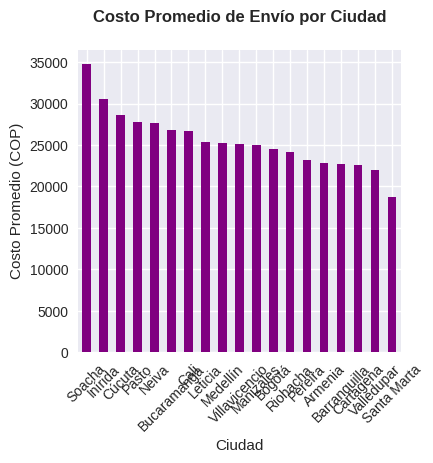

In [ ]:
plt.subplot(2, 3, 6)
envio_por_ciudad['Costo_Promedio'].plot(kind='bar', color='purple')
plt.title('Costo Promedio de Envío por Ciudad', fontweight='bold', pad=20)
plt.xlabel('Ciudad')
plt.ylabel('Costo Promedio (COP)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

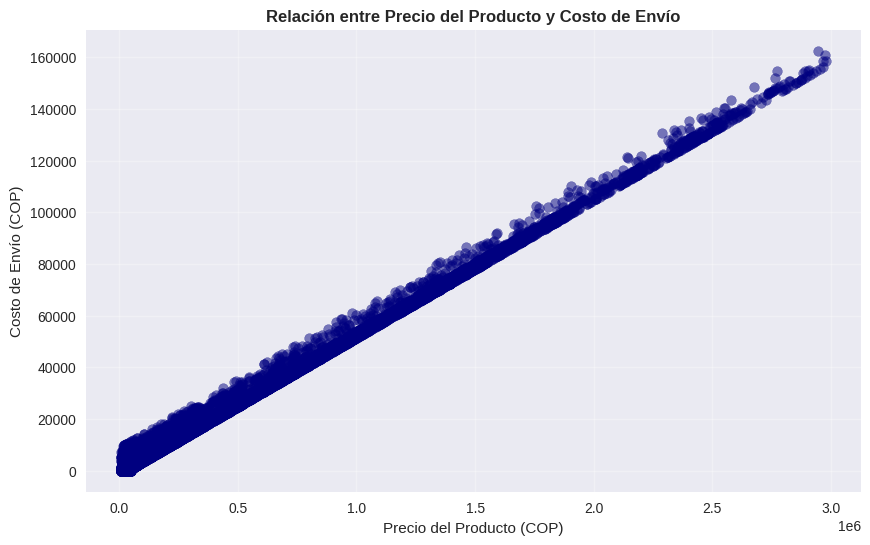

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(tienda_completa['Precio'], tienda_completa['Costo de envío'], alpha=0.5, color='navy')
plt.title('Relación entre Precio del Producto y Costo de Envío', fontweight='bold')
plt.xlabel('Precio del Producto (COP)')
plt.ylabel('Costo de Envío (COP)')
plt.grid(True, alpha=0.3)
plt.show()

Resumen

In [ ]:
print("\nRESUMEN")
print("=" * 50)


RESUMEN


In [ ]:
total_transacciones = len(tienda_completa)
ticket_promedio = tienda_completa['Precio'].mean()
productos_unicos = tienda_completa['Producto'].nunique()
ciudades_activas = tienda_completa['Lugar de Compra'].nunique()

print(f"MÉTRICAS GENERALES:")
print(f"  Total de transacciones:     {total_transacciones:8,}")
print(f"  Facturación total:          ${facturacion_total:12,.0f} COP")
print(f"  Ticket promedio:            ${ticket_promedio:12,.0f} COP")
print(f"  Productos únicos:           {productos_unicos:8,}")
print(f"  Ciudades con ventas:        {ciudades_activas:8,}")
print(f"  Calificación promedio:      {calificacion_general:12.2f}/5.0")
print(f"  Costo promedio envío:       ${envio_general:12,.0f} COP")

MÉTRICAS GENERALES:
  Total de transacciones:        9,435
  Facturación total:          $4,403,619,200 COP
  Ticket promedio:            $     466,732 COP
  Productos únicos:                 51
  Ciudades con ventas:              19
  Calificación promedio:              4.01/5.0
  Costo promedio envío:       $      24,875 COP


In [ ]:
top_ciudad_facturacion = facturacion_ciudad.index[0]
top_ciudad_calificacion = calificaciones_ciudad.index[0]
top_producto = productos_por_cantidad.index[0]
top_categoria = ventas_categoria.index[0]

print(f"\nTOP PERFORMERS:")
print(f"  Ciudad líder en facturación:     {top_ciudad_facturacion}")
print(f"  Ciudad mejor calificada:         {top_ciudad_calificacion}")
print(f"  Producto más vendido:            {top_producto}")
print(f"  Categoría líder:                 {top_categoria}")

print("\n" + "=" * 50)
print("ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 50)


TOP PERFORMERS:
  Ciudad líder en facturación:     Bogotá
  Ciudad mejor calificada:         Pasto
  Producto más vendido:            Mesa de noche
  Categoría líder:                 Electrónicos

ANÁLISIS COMPLETADO EXITOSAMENTE
